In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read the training dataset and save to a dataframe
x_train = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv");

#below reads the validation dataset
x_eval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv");

# you shoud have train and validation/test to see(test) if your algorithm is doing well. 
# you will train with x_train and validate with x_eval because it has not seen x_eval and there will beless bias.

In [3]:
# .head() shows the first five rows or entries in a data frame
x_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
# we want to know if a passenger will survive... 
# ...given specific features or characteristics (X) about a passenger
# for that we will use SURVIVED as our output(y) since this is what we are trying to predict.
# so lets put survived in y and remove it from our dataframe using pop

y_train = x_train.pop("survived")
y_eval = x_eval.pop("survived")

In [5]:
#remeber 0 is the first entry
#You can use this to print first entry info and y's
#you will see y object 0. because y for that entry has '0' because passenger will not survive

print(x_train.loc[0],y_train.loc[0]);

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [6]:
#statistical information about the dataframe
x_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [7]:
# we have 627 rows, 9 columns
# that is 627 examples, 9 features
x_train.shape

(627, 9)

<AxesSubplot:>

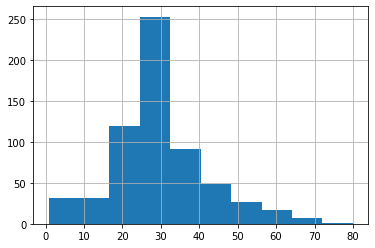

In [8]:
#to put the age in a histogram
#this can help know the common age among the passengers
#which age is present the most
x_train.age.hist()

<AxesSubplot:>

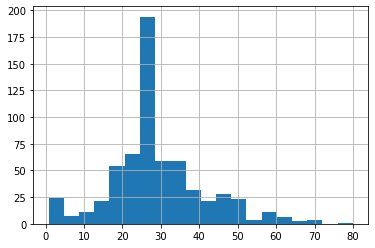

In [9]:
#To have more bins for better understanding
x_train.age.hist(bins=20)

In [10]:
#You can also get the first five enteries of the survived passengers
#first entry '0' for 'not surviving' and second entry '1' for 'will survive'
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [11]:
#Number of male and female passengers 
x_train.sex.value_counts()

male      410
female    217
Name: sex, dtype: int64

<AxesSubplot:>

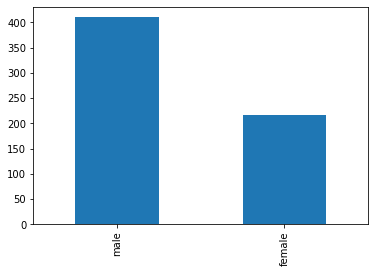

In [12]:
#To plot
x_train.sex.value_counts().plot(kind='bar')

<AxesSubplot:>

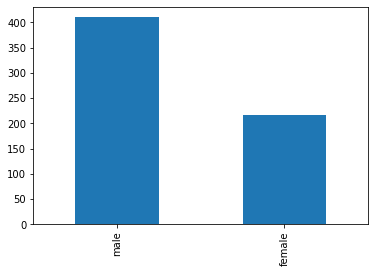

In [13]:
#You can also use square brackets
x_train["sex"].value_counts().plot(kind='bar')

<AxesSubplot:>

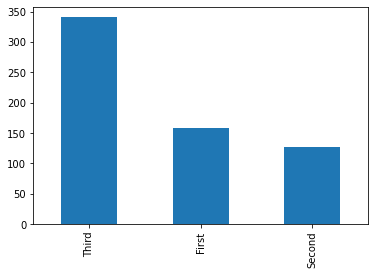

In [15]:
x_train["class"].value_counts().plot(kind='bar')

In [16]:
#youcancomnine both the features (x) and y again
pd.concat([x_train,y_train],axis=1)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,survived
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n,0
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n,1
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y,1
3,female,35.0,1,0,53.1000,First,C,Southampton,n,1
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y,0
...,...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y,0
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y,0
624,female,19.0,0,0,30.0000,First,B,Southampton,y,1
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n,0


<AxesSubplot:xlabel='sex'>

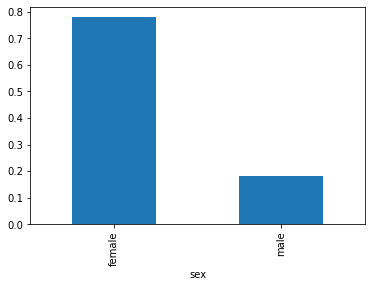

In [17]:
#To plot the percentage that survived by 'sex' 
pd.concat([x_train,y_train],axis=1).groupby('sex').survived.mean().plot(kind='bar')